In [6]:
import pandas as pd
import csv
df = pd.read_csv('final_data.csv')
df

,Unnamed: 0,Star_name,Distance,Mass,Radius
0,0,Sun,0.000015813,1.000000,1
1,1,Sirius,8.6,2.100000,1.71
2,2,Canopus,310,15.000000,71
3,3,Alpha Centauri,4.4,1.100000,1.2
4,4,Arcturus,37,1.100000,26
...,...,...,...,...,...
248,248,2MASSI J2356547-155310,74,0.076367,0.11201167
249,249,WISE 0410+1502,20,0.005728,0.12023271
250,250,WISE 0458+6434A,35.9,0.014319,0.4316046
251,251,WISE 0458+6434B,35.9,0.009546,0.3904994


In [7]:
df.columns

Index(['Unnamed: 0', 'Star_name', 'Distance', 'Mass', 'Radius'], dtype='object')

In [8]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [9]:
df.head()

,Star_name,Distance,Mass,Radius
0,Sun,0.000015813,1.0,1
1,Sirius,8.6,2.1,1.71
2,Canopus,310,15.0,71
3,Alpha Centauri,4.4,1.1,1.2
4,Arcturus,37,1.1,26


In [10]:
df['Radius']=df['Radius'].apply(lambda x: x.replace('$', '').replace(',', '')).astype('float')

In [11]:
radius = df['Radius'].to_list()
mass = df['Mass'].to_list()
gravity =[]

#converting solar mass and radius into km & kg
def convert_to_si(radius,mass):
    for i in range(0,len(radius)-1):
        radius[i] = radius[i]*6.957e+8
        mass[i] = mass[i]*1.989e+30
        
convert_to_si(radius,mass)

In [12]:
def gravity_calculation(radius,mass):
    G = 6.674e-11
    for index in range(0,len(mass)):
        g= (mass[index]*G)/((radius[index])**2)
        gravity.append(g)
        
gravity_calculation(radius,mass)

df["Gravity"] = gravity
df

,Star_name,Distance,Mass,Radius,Gravity
0,Sun,0.000015813,1.000000,1.000000,2.742692e+02
1,Sirius,8.6,2.100000,1.710000,1.969718e+02
2,Canopus,310,15.000000,71.000000,8.161153e-01
3,Alpha Centauri,4.4,1.100000,1.200000,2.095112e+02
4,Arcturus,37,1.100000,26.000000,4.462960e-01
...,...,...,...,...,...
248,2MASSI J2356547-155310,74,0.076367,0.112012,1.669385e+03
249,WISE 0410+1502,20,0.005728,0.120233,1.086673e+02
250,WISE 0458+6434A,35.9,0.014319,0.431605,2.108201e+01
251,WISE 0458+6434B,35.9,0.009546,0.390499,1.716928e+01


In [13]:
#df['Distance']=df['Distance'].apply(lambda x: x.replace('$', '').replace(',', '')).astype('float')
df.to_csv("star_with_gravity.csv")

In [14]:
df.dtypes

Star_name     object
Distance      object
Mass         float64
Radius       float64
Gravity      float64
dtype: object

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
df = pd.read_csv("star_with_gravity.csv")

In [17]:
df.head()

,Unnamed: 0,Star_name,Distance,Mass,Radius,Gravity
0,0,Sun,0.000015813,1.0,1.00,274.269161
1,1,Sirius,8.6,2.1,1.71,196.971800
2,2,Canopus,310,15.0,71.00,0.816115
3,3,Alpha Centauri,4.4,1.1,1.20,209.511165
4,4,Arcturus,37,1.1,26.00,0.446296


In [18]:
mass = df["Mass"].to_list()
radius = df["Radius"].to_list()
dist = df["Distance"].to_list()
gravity = df["Gravity"].to_list()

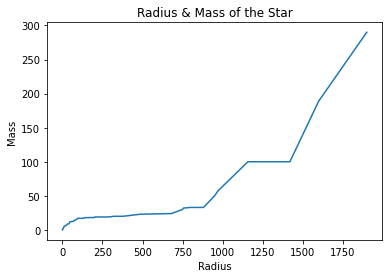

In [19]:
mass.sort()
radius.sort()
gravity.sort()
plt.plot(radius,mass)
#plt.plot(radius,gravity)

plt.title("Radius & Mass of the Star")
plt.xlabel("Radius")
plt.ylabel("Mass")
plt.show()

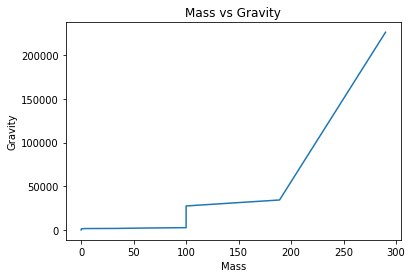

In [20]:
plt.plot(mass,gravity)

plt.title("Mass vs Gravity")
plt.xlabel("Mass")
plt.ylabel("Gravity")
plt.show()

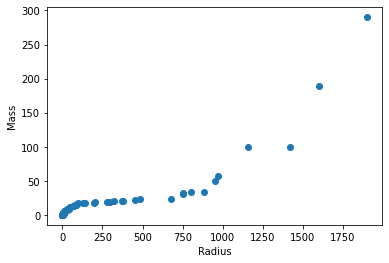

In [21]:
plt.scatter(radius,mass)
plt.xlabel("Radius")
plt.ylabel("Mass")
plt.show()

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
df = pd.read_csv("star_with_gravity.csv")

df.head()


,Unnamed: 0,Star_name,Distance,Mass,Radius,Gravity
0,0,Sun,0.000016,1.0,1.00,274.269161
1,1,Sirius,8.600000,2.1,1.71,196.971800
2,2,Canopus,310.000000,15.0,71.00,0.816115
3,3,Alpha Centauri,4.400000,1.1,1.20,209.511165
4,4,Arcturus,37.000000,1.1,26.00,0.446296


In [31]:
bools =[]
for d in df.Distance:
    if float(d)<=100:
        bools.append(True)
    else:
        bools.append(False)

In [32]:
is_dist = pd.Series(bools)

In [33]:
star_dist=df[is_dist]

In [34]:
star_dist.reset_index(inplace=True,drop=True)
star_dist.head()

,Unnamed: 0,Star_name,Distance,Mass,Radius,Gravity
0,0,Sun,0.000016,1.0,1.00,274.269161
1,1,Sirius,8.600000,2.1,1.71,196.971800
2,3,Alpha Centauri,4.400000,1.1,1.20,209.511165
3,4,Arcturus,37.000000,1.1,26.00,0.446296
4,5,Vega,25.000000,2.2,2.70,82.769843


In [35]:
star_dist.shape

(159, 6)

In [36]:
gravity_bool = []
for g in star_dist.Gravity:
    if g<=350 and g>=150:
        gravity_bool.append(True)
    else :
        gravity_bool.append(False)

In [38]:
is_gravity = pd.Series(gravity_bool)

In [39]:
final_stars = star_dist[is_gravity]
final_stars.head()

,Unnamed: 0,Star_name,Distance,Mass,Radius,Gravity
0,0,Sun,0.000016,1.0,1.00,274.269161
1,1,Sirius,8.600000,2.1,1.71,196.971800
2,3,Alpha Centauri,4.400000,1.1,1.20,209.511165
7,12,Altair,17.000000,1.8,1.80,152.371756
10,18,Fomalhaut,25.000000,1.9,1.80,160.836854


In [40]:
final_stars.shape

(21, 6)

In [41]:
final_stars.reset_index(inplace=True,drop=True)

In [42]:
final_stars.head()

,Unnamed: 0,Star_name,Distance,Mass,Radius,Gravity
0,0,Sun,0.000016,1.0,1.00,274.269161
1,1,Sirius,8.600000,2.1,1.71,196.971800
2,3,Alpha Centauri,4.400000,1.1,1.20,209.511165
3,12,Altair,17.000000,1.8,1.80,152.371756
4,18,Fomalhaut,25.000000,1.9,1.80,160.836854


In [43]:
final_stars.to_csv("filtered_stars.csv")

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
df = pd.read_csv("filtered_stars.csv")

In [46]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Star_name,Distance,Mass,Radius,Gravity
0,0,0,Sun,0.000016,1.0,1.00,274.269161
1,1,1,Sirius,8.600000,2.1,1.71,196.971800
2,2,3,Alpha Centauri,4.400000,1.1,1.20,209.511165
3,3,12,Altair,17.000000,1.8,1.80,152.371756
4,4,18,Fomalhaut,25.000000,1.9,1.80,160.836854


In [47]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Star_name', 'Distance', 'Mass', 'Radius',
       'Gravity'],
      dtype='object')

In [48]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'],axis=1,inplace=True)

In [49]:
name = df["Star_name"].to_list()
mass = df["Mass"].to_list()
radius = df["Radius"].to_list()
dist = df["Distance"].to_list()
gravity = df["Gravity"].to_list()

<BarContainer object of 9 artists>

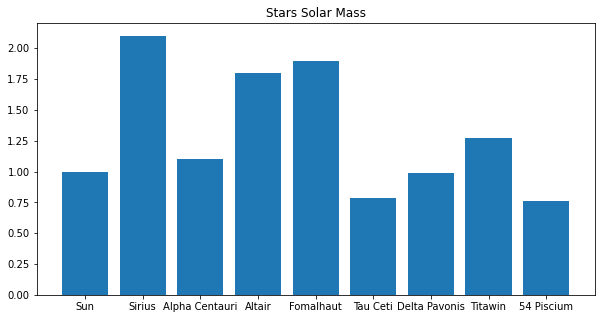

In [50]:
plt.figure(figsize=(10,5))
plt.title("Stars Solar Mass")
plt.bar(name[0:9],mass[0:9])

<BarContainer object of 9 artists>

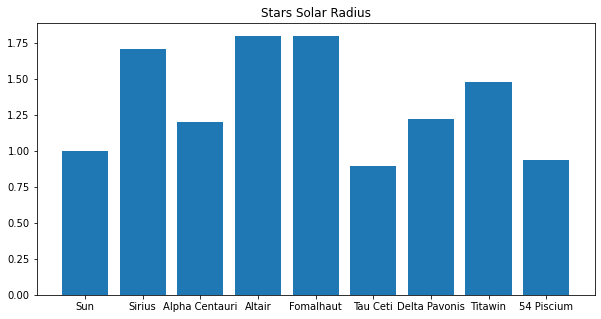

In [51]:
plt.figure(figsize=(10,5))
plt.title("Stars Solar Radius")
plt.bar(name[0:9],radius[0:9])

<BarContainer object of 9 artists>

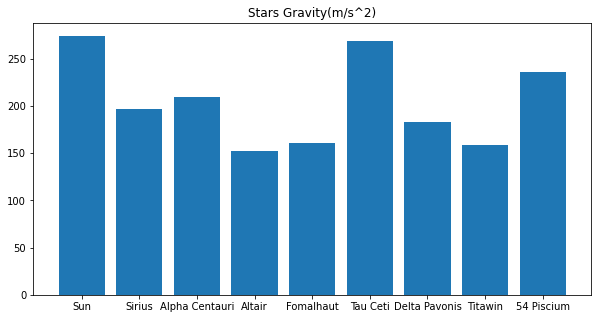

In [52]:
plt.figure(figsize=(10,5))
plt.title("Stars Gravity(m/s^2)")
plt.bar(name[0:9],gravity[0:9])

<BarContainer object of 9 artists>

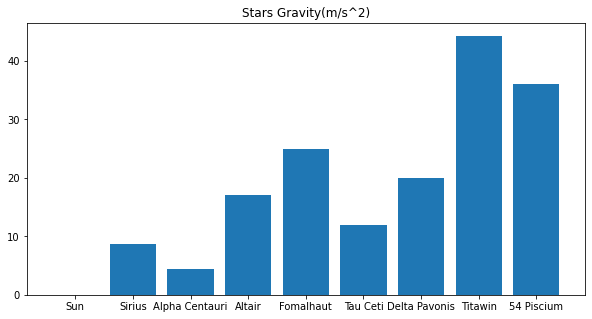

In [53]:
plt.figure(figsize=(10,5))
plt.title("Stars Gravity(m/s^2)")
plt.bar(name[0:9],dist[0:9])